##📌 EXTRACCIÓN

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Python/2_Estadisticas y Machine Learning/7_TelecomX2_Challengue/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [22]:
# Ver las columnas disponibles
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [23]:
#verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

##🛠️ Preparación de los Datos


 ✔️ Remover columnas irrelevantes

En la etapa de eliminación de columnas irrelevantes, el objetivo es excluir variables que:

* No tienen valor predictivo (ej.: identificadores únicos).
* Son redundantes con otras.
* Pueden causar fuga de datos (*data leakage*).


In [24]:
df = df.drop(columns=['customerID'])

 ✔️ Agrupación de No y No service

✅ **Resumen: Por qué agrupamos `"No"` y `"No internet service"`**

🎯 **Objetivo**

Reducir **multicolinealidad** y **simplificar los datos** sin perder relevancia para el modelo predictivo.

---

⚠️ **El problema original**

* Variables como `OnlineSecurity`, `StreamingTV`, etc., tenían **tres categorías**:

  * `"Yes"` → cliente usa el servicio
  * `"No"` → cliente tiene internet, pero no contrató el servicio
  * `"No internet service"` → cliente **ni siquiera tiene internet**, por lo tanto no puede usar el servicio

* Esto generaba **multicolinealidad perfecta** al transformar estas categorías en *dummies*, lo que:

  * Creaba **correlación 1.0** entre variables
  * Generaba **VIF infinito**
  * Comprometía la estabilidad y el rendimiento de los modelos

---

✅ **La solución: agrupar `"No internet service"` como `"No"`**

* **Agrupamos** `"No internet service"` como `"No"` para simplificar la variable:

  * Ahora: `"Yes"` = usa el servicio
    `"No"` = no usa el servicio (por cualquier motivo)

* Esto **reduce la dimensionalidad** y **evita multicolinealidad**.

* La información de que el cliente **no tiene internet** sigue estando en la variable `InternetService`.

---

🧠 **¿Y el impacto?**

* Perdemos un matiz (por qué el cliente no usa el servicio), **pero**:

  * Esto rara vez afecta el rendimiento del modelo
  * Ganamos **más robustez, menos ruido y menos redundancia**


In [25]:
# para crear uno nuevo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

✔️ Verificación nuevamente de los valores nulos


In [27]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [28]:
# Verifica valores nulos en las dos columnas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [29]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

**Tratamiento de valores nulos**

Al identificar valores nulos en las columnas `Total.Day` y `account.Charges.Total`, es necesario decidir entre **eliminar** o **rellenar** esas entradas.

* **Eliminar filas**: como el número de valores nulos es pequeño (11 filas en más de 7 mil), podemos eliminar esas filas sin afectar el análisis. Esto evita introducir distorsiones en los resultados.

* **Reemplazar por cero**: esta opción puede usarse cuando el valor nulo representa ausencia de dato o servicio (por ejemplo, ninguna cobranza), pero puede distorsionar promedios y sumas si no es el caso real.

En este proyecto, optamos por **eliminar las filas con valores nulos** por seguridad y simplicidad, asegurando que los datos usados estén completos.


In [30]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


✔️ Normalización/Estandarización


🔄 Normalización de los datos

La normalización es un paso común en el preprocesamiento de datos, especialmente importante para algoritmos que son **sensibles a la escala de los atributos**, como:

* KNN (K-Nearest Neighbors)
* Redes Neuronales
* Regresión Logística
* SVM (Support Vector Machine)

Modelos basados en árboles (como Decision Tree, Random Forest y XGBoost) **no requieren normalización**, ya que no dependen de la escala de los datos para construir sus reglas de decisión.

En este proyecto, aplicaremos la **normalización Min-Max**, que transforma los valores al rango **\[0, 1]**. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo.

```python
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Mostrando los datos normalizados
dados.head()
```


## ≡ Correlación entre las variables


In [31]:
corr = df_encoded.corr()

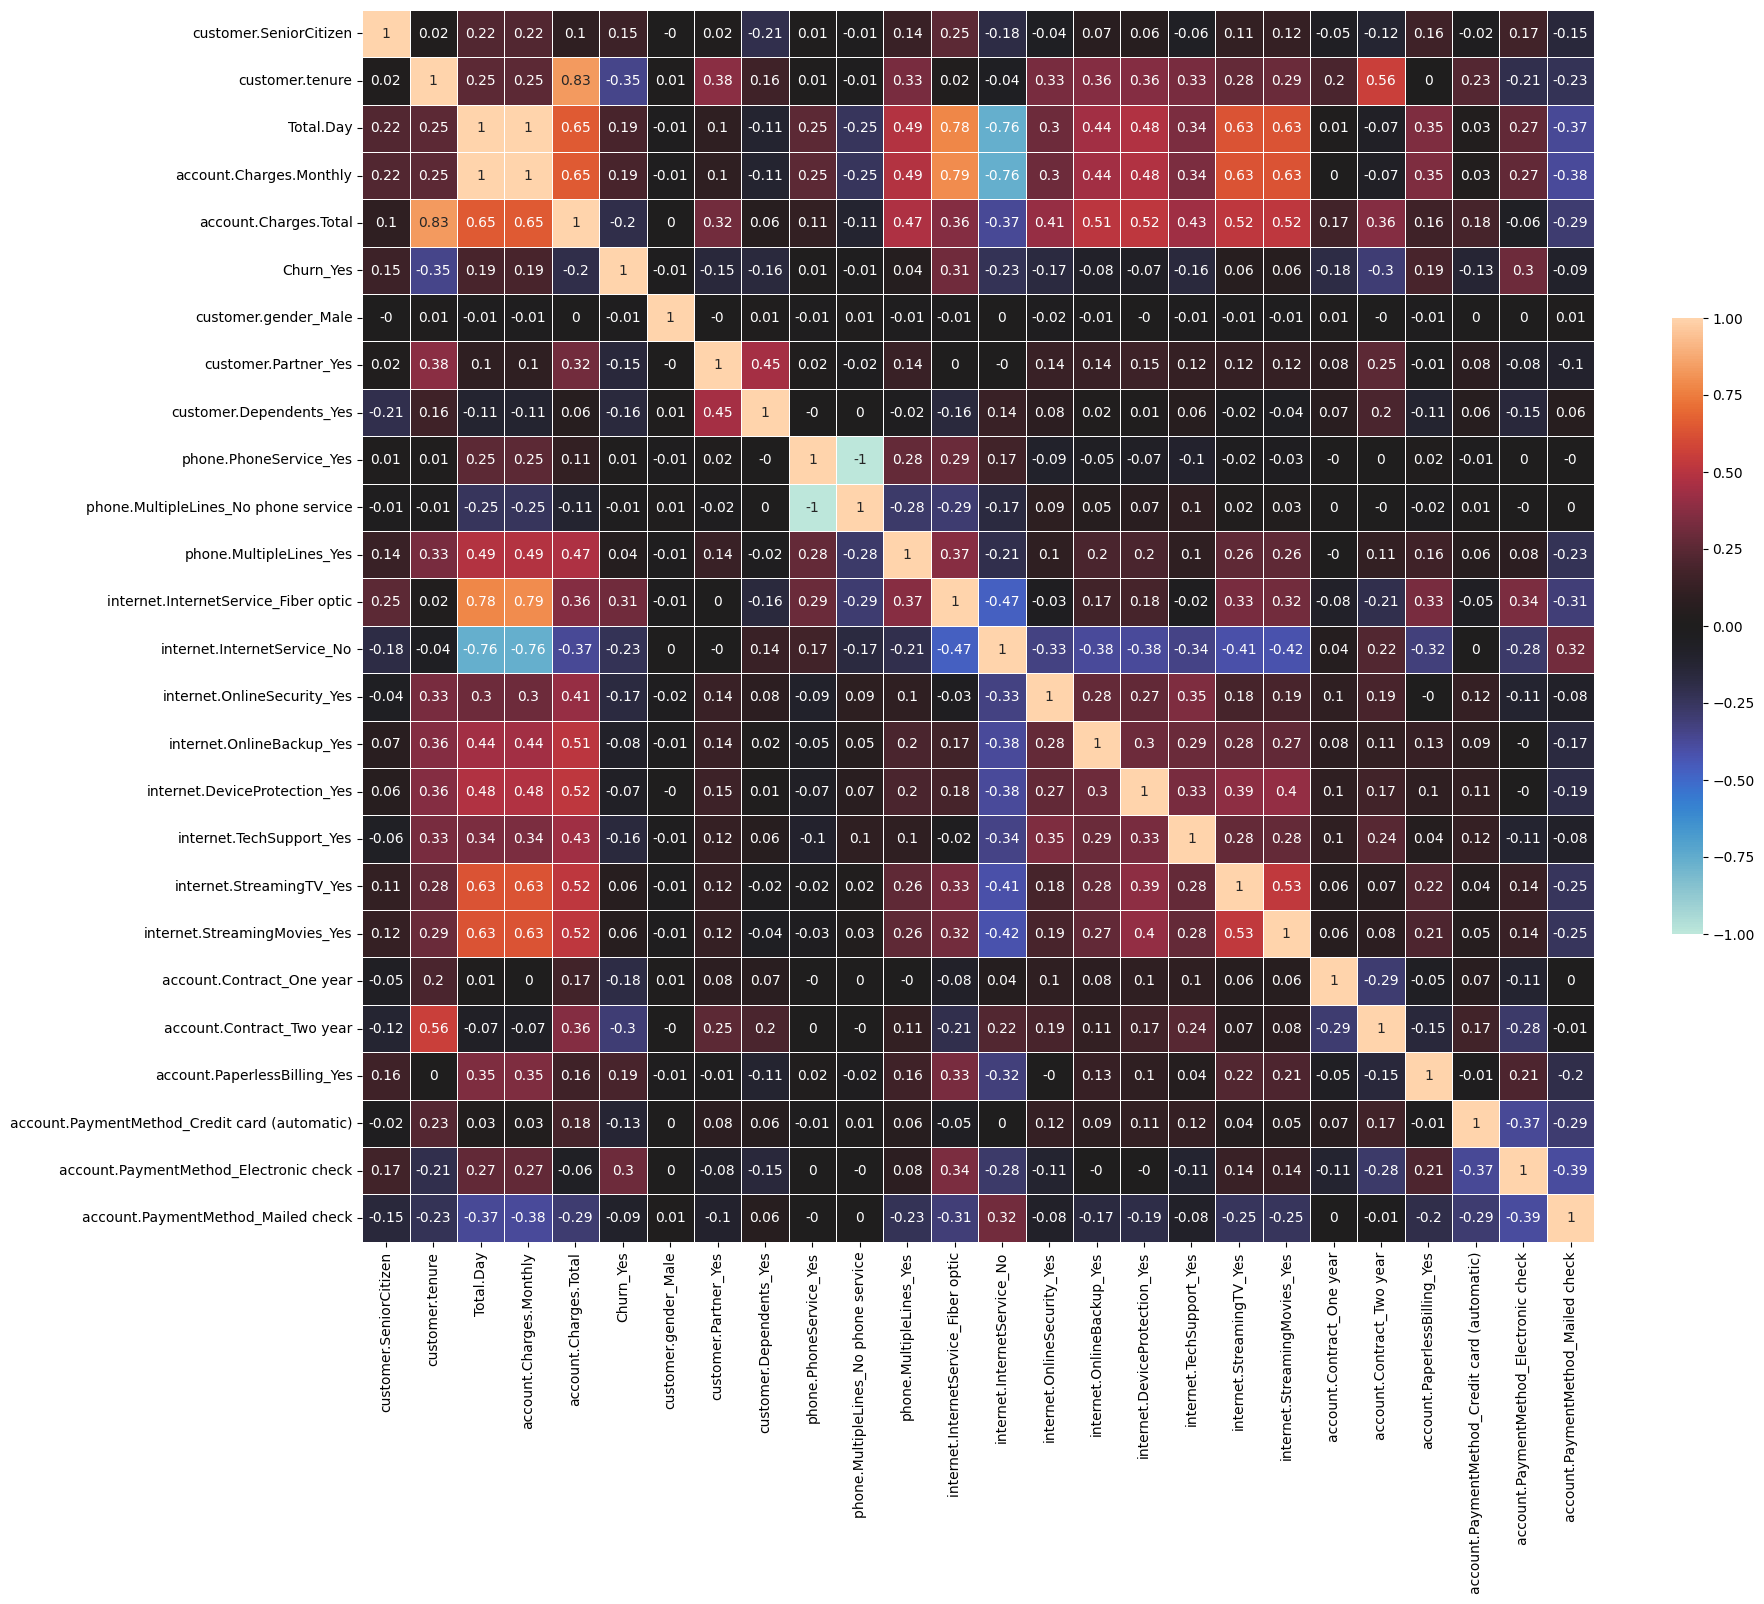

In [32]:
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

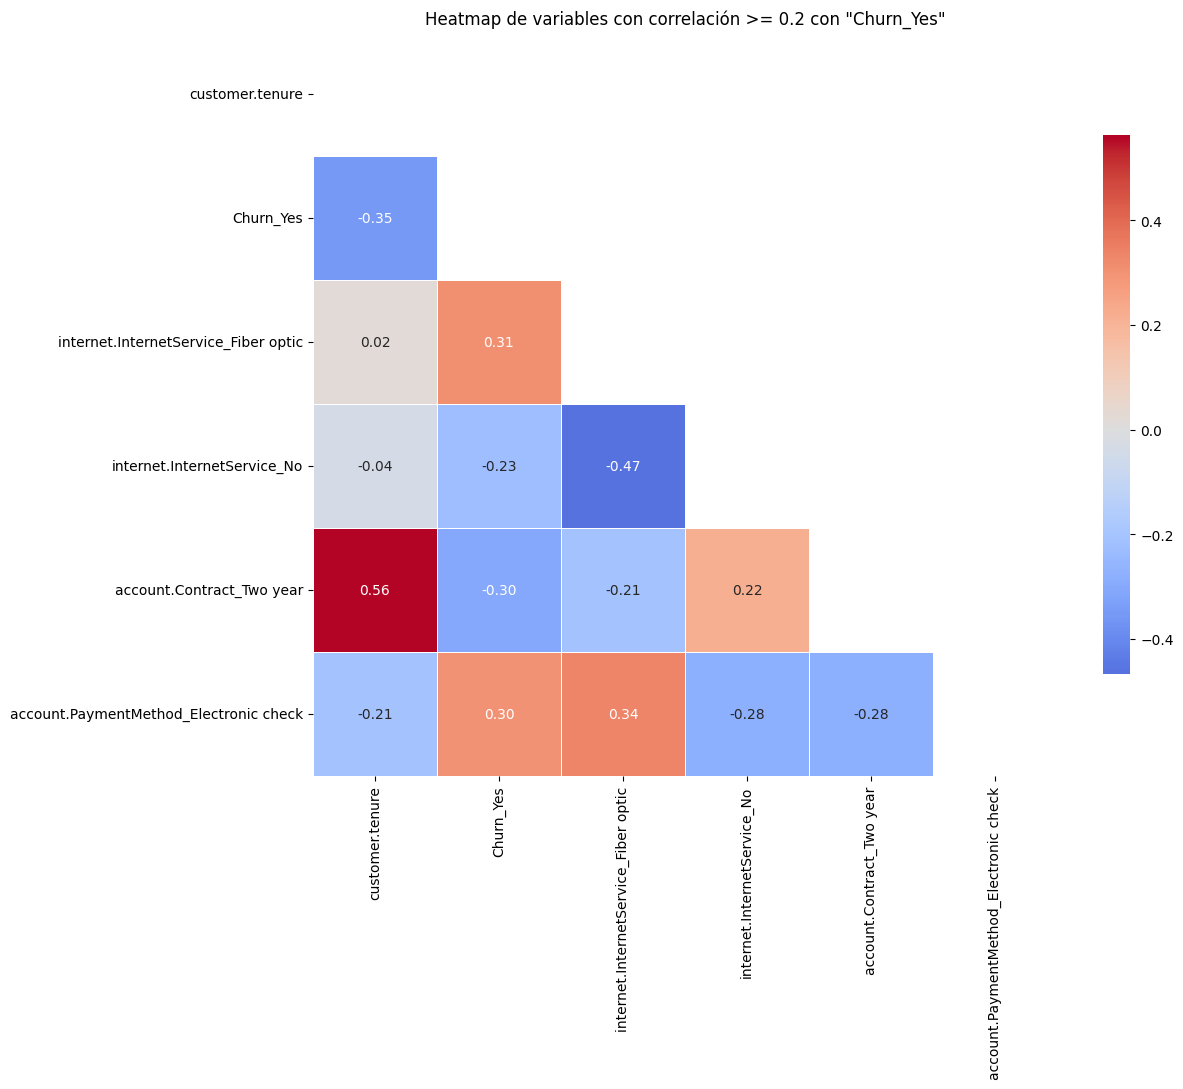

In [33]:
#```python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()
#```


**Explicación del uso del umbral y de la máscara en el heatmap de correlación**

Cuando trabajamos con análisis de correlación entre muchas variables, la matriz de correlación puede volverse muy grande y difícil de interpretar visualmente. Por ejemplo, si tenemos 50 variables, la matriz tendrá 50 x 50 = 2500 valores, lo que genera un gráfico confuso y poco informativo.

**Uso del umbral para selección de variables relevantes**

Para facilitar el análisis, elegimos un **umbral de correlación absoluta** respecto a la variable objetivo (en este caso, `"Evasión"`).

* Este umbral es un valor mínimo para considerar que la correlación es relevante o significativa para nuestro análisis.
* Por ejemplo, un umbral de 0.3 significa que solo vamos a mirar variables cuya correlación con `"Evasión"` sea mayor que 0.3 (positiva o negativa).
* Variables con correlación por debajo de ese valor tienden a no tener influencia importante o clara sobre la variable objetivo y, por eso, se descartan para esta visualización.
* Esto ayuda a **reducir el número de variables**, haciendo el heatmap más legible y enfocado en las relaciones importantes.

> **Nota:** El valor exacto del umbral puede variar según el contexto, pero generalmente valores entre 0.2 y 0.5 son buenos puntos de partida para análisis exploratorios.

**Uso de la máscara del triángulo superior (triángulo invertido)**

La matriz de correlación es **simétrica** respecto a la diagonal principal:

* El valor en la posición `(i, j)` es igual al valor en la posición `(j, i)`.
* Esto significa que el heatmap muestra información repetida en el triángulo superior e inferior de la matriz.

Para mejorar la claridad del gráfico, aplicamos una **máscara para ocultar el triángulo superior (incluyendo la diagonal)**, dejando visible solo el triángulo inferior.

Esto trae las siguientes ventajas:

* **Evita redundancia visual**, mostrando cada par de variables una única vez.
* **Hace el gráfico más limpio y fácil de interpretar.**
* Ayuda a destacar las correlaciones importantes sin confusión.

**¿Por qué esta aproximación es adecuada para nuestro problema?**

* Nuestro foco es entender qué variables tienen mayor correlación con la variable objetivo `"Evasión"`.
* Filtrando por las variables más relevantes, obtenemos un subconjunto manejable.
* Mostrando solo el triángulo inferior de la matriz filtrada, podemos visualizar claramente esas correlaciones y las interrelaciones entre estas variables, sin contaminación visual.
* Esta técnica facilita la comunicación de resultados y el direccionamiento de análisis futuros.


---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.2** (o ≤ -0.2) con la variable objetivo `Churn_Yes`.

---

🔍 **Correlación con `Churn_Yes` (variable objetivo)**

| Variable                                 | Correlación con Churn\_Yes | Interpretación                                                                                                               |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                  | Clientes con fibra óptica tienen **mayor probabilidad de churn**. Puede estar relacionado al costo o a la competitividad.    |
| `account.PaymentMethod_Electronic check` | **+0.30**                  | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado.                    |
| `account.Contract_Two year`              | **-0.30**                  | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios)                                           |
| `customer.tenure`                        | **-0.35**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado                                               |
| `internet.InternetService_No`            | **-0.23**                  | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |


## 🔍 Análisis de Multicolinealidad


2. **Usar análisis del Factor de Inflación de la Varianza (VIF):**

* El VIF ayuda a detectar la presencia de multicolinealidad entre variables independientes.
* Generalmente, **VIF > 5** o **VIF > 10** indica que la variable está colineal con otras y puede ser eliminada.


✅ **¿Cuándo es válido calcular el VIF?**

Puedes (y debes) calcular el VIF si:

1. **Vas a usar modelos lineales** (ej.: regresión logística, regresión lineal)
2. **Quieres interpretar los coeficientes** con claridad (la multicolinealidad distorsiona signos y magnitudes)
3. **Quieres garantizar estabilidad en el modelo**

---

❌ ¿Cuándo puedes saltarte el VIF (o postergarlo)?

* Si vas a usar **modelos no lineales**, como:

  * Árboles de decisión
  * Random Forest
  * XGBoost
  * Redes neuronales

* Estos modelos **no son sensibles a la multicolinealidad**.

---

✅ Conclusión final

| Pregunta                                           | Respuesta                                             |
| -------------------------------------------------- | ----------------------------------------------------- |
| ¿El nuevo heatmap muestra multicolinealidad grave? | **No**                                                |
| ¿Necesito calcular el VIF obligatoriamente?        | **No, pero es recomendable si usas modelos lineales** |
| ¿Vale la pena como verificación extra?             | **Sí, especialmente si el modelo es interpretativo**  |

---

Si vas a seguir con regresión logística, por ejemplo, **recomendaría calcular el VIF**.


1. Importar las bibliotecas necesarias


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [35]:
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

3. Añadir constante (intercepto)

In [36]:
X_const = add_constant(X)

4. Calcular el VIF

In [37]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


✅ **Resumen general del análisis VIF**

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |

---

🔍 **Principales alertas en tu resultado**

❗️ 1. `phone.PhoneService_Yes` y `phone.MultipleLines_No phone service` → VIF = `inf`

Estas dos variables **siguen siendo perfectamente colineales entre sí** o con otra variable.

🔍 Causa probable:

* Ambas provienen de **la misma variable categórica original** (`PhoneService`), y el encoding generó **redundancia**.
* Si el cliente **no tiene teléfono**, no puede tener múltiples líneas ⇒ valores 100% ligados.

📌 **Solución recomendada:**

* **Elimina una de estas columnas.** Por ejemplo:

  ```python
  df.drop(columns=["phone.PhoneService_Yes"], inplace=True)
  ```
* O rehacer el encoding con `drop_first=True` para simplificar la estructura.

---

❗️ 2. `account.Charges.Monthly` → VIF = **813.86**

* Esto es extremadamente alto.
* Esta variable está **altamente correlacionada con `account.Charges.Total` y `Total.Day`**.

📌 **Solución:**

* Verifica si `Charges.Monthly`, `Charges.Total` y `Total.Day` contienen **información repetida** (ej.: `Total = Monthly * tenure`).
* Si es así, **elimina una o dos de estas columnas** para evitar redundancia.

---

⚠️ 3. Otros VIFs altos (moderados a severos)

| Variable                          | VIF       | Comentario                                  |
| --------------------------------- | --------- | ------------------------------------------- |
| `InternetService_Fiber optic`     | 137.9     | Altamente colineal con `InternetService_No` |
| `InternetService_No`              | 96.9      | Mismo motivo anterior                       |
| `StreamingTV` / `StreamingMovies` | 22.4–22.5 | Dependen directamente de tener internet     |
| `Charges.Total`                   | 10.8      | Relacionado con `Monthly` y `tenure`        |

📌 **Soluciones combinadas:**

* Mantener **solo una** de las variables entre `InternetService_Fiber optic`, `InternetService_No` o usar `drop_first=True`.
* Evaluar si es necesario mantener **todas** las variables derivadas de internet (streaming, seguridad, etc.).
* Verificar si `Charges.Total` puede ser **recalculado**, si ya existen `Monthly` y `tenure`.


**VIF REHECHO**

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


✅ Análisis del nuevo VIF

| Rango de VIF | Interpretación                      |
| ------------ | ----------------------------------- |
| VIF ≈ 1      | Sin multicolinealidad (óptimo)      |
| 1 < VIF ≤ 5  | Baja (aceptable)                    |
| 5 < VIF ≤ 10 | Moderada (vigilar)                  |
| VIF > 10     | Alta (atención o posible exclusión) |

---

🔍 Puntos importantes en tu resultado:

| Variable                  | VIF     | Observaciones                                                                               |
| ------------------------- | ------- | ------------------------------------------------------------------------------------------- |
| `account.Charges.Monthly` | 18.17   | Aún con multicolinealidad alta — puede estar correlacionada con `Charges.Total` y `tenure`. |
| `account.Charges.Total`   | 10.71   | Justo en el límite — posible redundancia con `Monthly` y `tenure`                           |
| `const`                   | 35.88   | **Normal** para la constante (`const`) — se puede ignorar                                   |
| Resto                     | 1.0–7.5 | Todos con VIF **aceptable u óptimo** ✔️                                                     |

---

✅ Conclusión práctica

* ✅ **La multicolinealidad crítica fue resuelta** (sin `inf`, sin redundancia perfecta)
* ⚠️ **Solo `Charges.Monthly` y `Charges.Total` siguen colineales entre sí** — esto ya era esperado

---

🔧 ¿Qué puedes hacer ahora?

Opción 1 – **Seguir con el modelo como está**

Si el modelo es robusto (como árbol, XGBoost, etc.) y **no necesitas interpretar los coeficientes**, puedes dejarlo así.

> La multicolinealidad solo afecta modelos **lineales interpretables**.

---

Opción 2 – **Eliminar una de las dos variables (`Monthly` o `Total`)**

Si quieres **reducir el VIF y simplificar**, puedes mantener **solo una** de ellas:

```python
# Ejemplo: mantener solo Charges.Monthly
X_filtered.drop(columns=["account.Charges.Total"], inplace=True)
```

Luego solo recalcula el VIF para confirmar que el problema desaparece.


**VIF 2**

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Eliminar la variable account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


## 🤖 Modelos Predictivos


Importación de las bibliotecas

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar features y target

In [41]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir entrenamiento y prueba


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [44]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [46]:
#```python
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
#```


Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



**Random Forest**

In [47]:
#```python
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
#```


Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusión:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

